** *This notebook is unfinished and still under development* **

# 2D NMR Processing and Display

a simplified environment for processing 2D Bruker NMR datasets with `SPIKE`.

Run each python cell in sequence by using the ⇥Run button above (or typing *shift* Enter).

Cells are meant to be used in order, taking you to the complete analysis, but you can go back at any time.

The SPIKE code used for processing is visible in the cells, and can be used as a minimal tutorial.

***Remark*** *to use this program, you should have installed the following packages:*

- *a complete scientific python environment* ( *tested with python 3.6 - [anaconda](https://www.anaconda.com/) 
 but it should also work in python 2.7*)
- [`spike`](https://www.bitbucket.org/delsuc/spike) ( *version 0.99.9 minimum* )
- [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/)  ( *tested with version 7.1* )
- [`ipyml`](https://github.com/matplotlib/jupyter-matplotlib)  ( *adds interactivity in the notebook* )

## Initialization
the following cell should be run only once, at the beginning of the processing

In [1]:
# load all python and interactive tools
from __future__ import print_function, division
from IPython.display import display, HTML, Markdown, Image
display(Markdown('## STARTING Environment...'))
import matplotlib.pyplot as plt
%matplotlib widget
import os.path as op
import spike
from spike.File.BrukerNMR import Import_2D
from spike.Interactive import INTER as I
from spike.Interactive import INTER_2D as I2D
from spike.Interactive.ipyfilechooser import FileChooser
display(Markdown('## ...program is Ready'))
from importlib import reload  # the two following lines are debugging help
reload(I)                   # and can be removed safely when in production
I.hidecode(message="")
I.hidedoc()

## STARTING Environment...


          SPIKE
    Version     : 0.99.21
    Date        : 23-02-2021
    Revision Id : 490
*** zoom3D not loaded ***
plugins loaded:
Bruker_NMR_FT,  Bucketing,  FTMS_calib,  Fitter,  Integrate,  Linear_prediction,  PALMA,  Peaks,  apmin,  bcorr,  bokeh_display,  diagonal_2DMS,  fastclean,  gaussenh,  pg_sane,  rem_ridge,  sane,  sg,  test,  urQRd,  wavelet, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin


## ...program is Ready

### Choose the file
The `FileChooser()` tool creates a dialog box which allows to choose a file on your disk

- use the `Select` button
- modify the ( *optional* ) `path` argument, to start the exploration on a given location
- After the selection, the selected filename is found in `FC.selected`

In [2]:
FC = FileChooser(path='/DATA/',filename='ser')
display(FC)

FileChooser(path='/DATA', filename='ser', show_hidden='False')

### Import dataset

This is simply done with the `Import_2D()` tool, which returns a `SPIKE` object.

We store the dataset into a variable, typing the variable name shows a summary of the dataset. 

Reading file  /DATA/SM_ARTE_v3/ARTEref_161123/40/ser




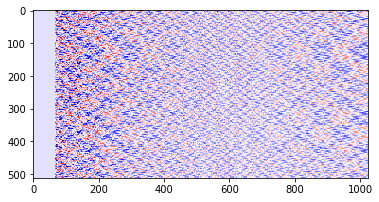

In [26]:
print('Reading file ',FC.selected)
d2 = Import_2D(FC.selected)
d2.filename = FC.selected
d2.pulprog = d2.params['acqu']['$PULPROG']
print (d2.params['acqu']['title'])
#d2.set_unit('sec').display(title="%s %s"%(FC.nmrname,d2.pulprog), scale='auto')
plt.imshow(d2.get_buffer().imag, cmap="seismic"); #  "Accent")

In the current set-up, the figure can be explored *(zoom, shift, resize, etc)* with the jupyter tools displayed  below the dataset.
The figure can also be saved as a `png` graphic file.

At anytime, the figure can be frozen by clicking on the blue button on the upper right corner, just rerun the cell to make it interactive again.

## Basic Processing
We are going to use a basic processing set-up, check the documentation for advanced processing

### Fourier Transform - modulus mode!

computed scale: 3.26


2D data-set
Axis F1 :NMR axis at 176.065935 MHz, 512 real points, from -14.995500 ppm (-2640.196733 Hz) to 135.004500 ppm  (23769.693565 Hz)
Axis F2: NMR axis at 700.163292 MHz, 2048 real points, from -0.791418 ppm (-554.121925 Hz) to 10.195030 ppm  (7138.185767 Hz)
data-set is real

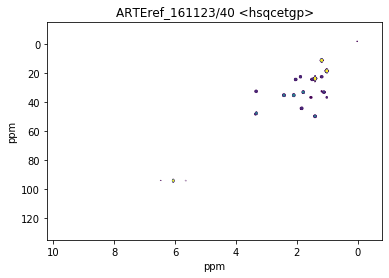

In [27]:
D2 = d2.copy() # copy the imported data-set to another object for processing
# bk_ftF2 and bk_ftF1 (define in the Bruker plugin) find which FT to apply depending on FnMODE
D2.apod_sin(maxi=0.5,axis='F2').zf(1,2).bk_ftF2()  # chaining  apodisation - zerofill - FT
D2.apod_sin(maxi=0.5,axis='F1').zf(2,1).bk_ftF1()  # chaining  apodisation - zerofill - FT
D2.modulus().set_unit('ppm').rem_ridge()
D2.display(scale="auto", autoscalethresh=100.0, title="%s %s"%(FC.nmrname,d2.pulprog))  # chain  set to ppm unit - and display

`I.Show2D` is a convinient tool to explore 2D's

you can 

### Advanced Phase sensitive processing



computed scale: 37.17


2D data-set
Axis F1 :NMR axis at 176.065935 MHz, 512 complex pairs,  from -14.995500 ppm (-2640.196733 Hz) to 135.004500 ppm  (23769.693565 Hz)
Axis F2: NMR axis at 700.163292 MHz, 2048 complex pairs,  from -0.791418 ppm (-554.121925 Hz) to 10.195030 ppm  (7138.185767 Hz)
data-set is hypercomplex (order 2)

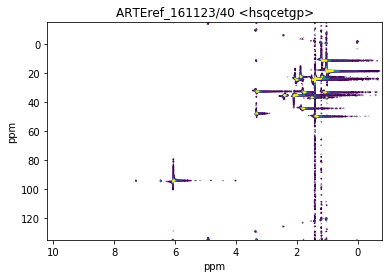

In [28]:
D2 = d2.copy() # copy the imported data-set to another object for processing
# bk_ftF2 and bk_ftF1 (define in the Bruker plugin) find which FT to apply depending on FnMODE
D2.apod_sin(maxi=0,axis='F2').zf(1,2).bk_ftF2().bk_pk()  # chaining  apodisation - zerofill - FT - phase
D2.apod_sin(maxi=0,axis='F1').zf(2,1).bk_ftF1()  # chaining  apodisation - zerofill - FT
D2.set_unit('ppm').rem_ridge()
D2.display(scale="auto",  autoscalethresh=6.0, title="%s %s"%(FC.nmrname,d2.pulprog))  # chain  set to ppm unit - and display

### Rephasing
( *This is a temporary tool* )

WARNING this tool is not functional/tested yet


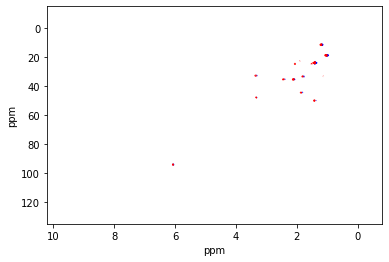

In [29]:
reload(I2D)
I2D.Phaser2D(D2)

# An interactive Display

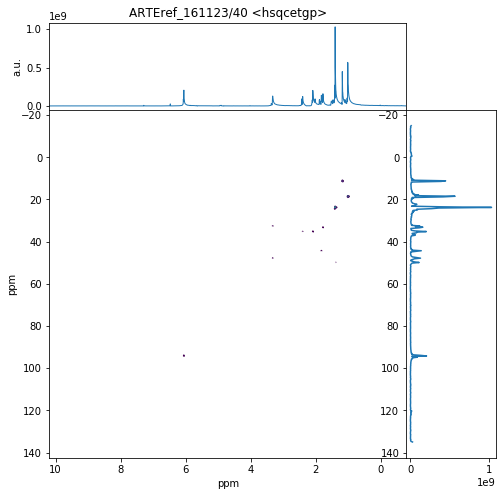

In [30]:
D2.set_unit('ppm')
b = I2D.Show2D(D2.copy().real(axis='F1').real(axis='F2'), title="%s %s"%(FC.nmrname,d2.pulprog))

## Save on disk

In [ ]:
D2.save('example1.gs2')

# The following entries or not finished yet

## Peak-Picker
- moving the threshold determines the minimum peak intensity
- peaks are searched only in the selected zoom window

## Export a bucket list

In [ ]:
# adapt the parameters below
Zoom = ((0.5,8),(0.5,8))                    # zone to bucket       - in ppm
BucketSize = (0.1,0.1)                 # width of the buckets - in ppm
Output = 'screen'                   # 'screen'  or  'file'  determines output
BucketFileName = 'bucket.csv'     #  the filename if Output (above) is 'file'  - don't forget the .csv extension.

In [ ]:
# the following cell executes the bucketing
if Output == 'file':
    with open(BucketFileName,'w') as F:
        D2.bucket2d(zoom=Zoom, bsize=BucketSize, file=F)
    print('buckets written to %s\n'%op.realpath(BucketFileName))
else:
    D2.bucket2d(zoom=Zoom, bsize=BucketSize)

*Tools in this page is under intensive development - things are going to change rapidly.*